In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import squarify
from datetime import datetime

from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn_pandas import DataFrameMapper, gen_features

import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv("/Users/evgenijselisev/Desktop/marketing_campaign.csv", sep="\t")
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [62]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Почти (26 из 29) все столбцы являются числовыми переменными.
* Только в одном столбце (Доход) отсутствуют значения, и это небольшая сумма.
* Удалите столбец "ID", так как для каждой строки может быть уникальное значение.
* Преобразуйте формат типа столбца "Dt_customer" в datetime.
* Создайте столбец "возраст" на основе самой последней даты в столбце "dt_customer".
* Похоже, что остальные столбцы имеют соответствующий формат.

In [64]:
df.select_dtypes('object').nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

In [65]:
df.describe(percentiles=[.05,.5,.25,.75,.95,.99])

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
5%,576.850000,1950.000000,18985.500000,0.000000,0.000000,4.000000,3.000000,0.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
95%,10675.050000,1988.000000,84130.000000,1.000000,1.000000,94.000000,1000.000000,123.000000,687.100000,168.050000,...,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.0,11.0,1.000000
99%,11074.610000,1992.000000,94458.800000,2.000000,2.000000,98.000000,1285.000000,172.000000,915.000000,226.220000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.0,11.0,1.000000




* "Z_CostContact" и "Z_Revenue" не предоставляют никакой значимой информации; таким образом, мы удалим эти столбцы.

* Примерно 95% клиентов имеют в своих семьях либо 1, либо 0 подростков, либо детей.

* Мы можем создать новый столбец под названием "YoungHome", агрегируя эти две переменные, и посмотреть, получим ли мы больше интересной информации.

* В базе данных нет клиентов с отсутствием покупок продолжительностью более 100 дней.

* Самая последняя кампания (столбец ответа) получила самый высокий уровень принятия.

* Мясо и вино выделяют себя как самые прибыльные продукты (с большой разницей по сравнению с остальными).

In [66]:
print("Количество точек данных до удаления строк с отсутствующими значениями:", len(df))


Количество точек данных до удаления строк с отсутствующими значениями: 2240


In [67]:
#Удалим значения NA
df = df.dropna()

print("Количество точек данных после удаления строк с отсутствующими значениями:", len(df))

Количество точек данных после удаления строк с отсутствующими значениями: 2216


# Дубликаты

In [68]:
df.shape

(2216, 29)

In [69]:
df[df.duplicated(keep=False)].sort_values(by='Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [70]:
df[df.duplicated(keep='first')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [71]:
df.drop_duplicates(inplace=True)
df.shape

(2216, 29)

# Логистический  анализ

На этом этапе нашей основной целью является проведение всестороннего обследования, сохраняя при этом практическую и
бизнес-ориентированную перспективу. За этим последует углубление в более продвинутый статистический анализ.

Наша главная цель - провести первоначальную оценку всех столбцов и извлечь предварительную информацию для предстоящих
EDA и функциональных разработок.

In [72]:
df.Education.value_counts(dropna=False, normalize=True)

Education
Graduation    0.503610
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: proportion, dtype: float64

In [73]:
df.Marital_Status.value_counts(dropna=False, normalize=True)

Marital_Status
Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: proportion, dtype: float64

In [74]:
last_year = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y').dt.year.max()
print("Мы рассчитаем возраст клиентов на основе этого года: ",last_year)

Мы рассчитаем возраст клиентов на основе этого года:  2014


* Около 88%  клиентов закончили обучение, что дает нам довольно направление возрастные диапазоны


* Нужно убедиться, что в этой конкретной колонке отсутствует значительная информационная ценность, возможно, было бы разумно рассмотреть ее упущение.

*Feature Engineering:*

* Подход может включать в себя категоризацию случаев, помечающих как "YOLO" и "Absurd" как "Single".

* Упростиим колонку «Семейное положение», классифицируя как «Партнер» или «Не Партнер»



# EDA

Учитывая ограниченную доступность демографических данных о клиентах, анализ будет основан на их финаносовой и покупательной способности. Нужно объединить различные переменные, связанные с их привычками, чтобы получить потенциально ценную информацию.

In [75]:
df_copy = df.copy()

In [76]:
def initial_cleaning(df):
   # Удаляем неинформативные столбцы
    df.drop(['ID','Z_CostContact','Z_Revenue'], axis=1, inplace=True)
    # Меняем формат колонки dt_customer
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")
    # Меняем содержание столба Семейное положение
    df['Marital_Status'] = df.loc[:,'Marital_Status'].str.replace('Alone','Single')
    df['Marital_Status'] = df.loc[:,'Marital_Status'].apply(lambda x: "Single" if x == 'YOLO' or x == 'Absurd' else x)
    # Меняем названия для удобства 
    df.columns = df.columns.str.lower()
    # Создаем новый столбец
    df['younghome'] = df.kidhome + df.teenhome
    return df

df_copy = initial_cleaning(df_copy)

In [77]:
def feat_engineering(df):

    # Семейное положение "в браке" или "вместе"
    couple = ['Married','Together']
    
    # Создание нового столбца 'age' (возраст)
    df['age'] = max(df['dt_customer'].dt.year) - df['year_birth']

    # Создание нового столбца 'partner' (наличие/отсутствие партнера)
    df['partner'] = df['marital_status'].apply(lambda x: 'Партнер' if x in couple else 'Без партнера')
    
    return df


df_copy = feat_engineering(df_copy)

In [78]:
def num_plot(df, col):

  fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,4),gridspec_kw={"height_ratios": (.2, .8)})
  sns.boxplot(x=col, data=df, ax=ax[0], color='#7171cf', linewidth=1.5)
  ax[0].set_xlabel(None)
  ax[0].set(yticks=[])
  sns.histplot(x=col, data=df, ax=ax[1], alpha=.6, color='#7171cf')
  ax[1].set_xlabel(col.replace('_',' ').title(), fontsize=22, loc= 'left')
  plt.axvline(df[col].mean(), color='#39568CFF', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
  plt.axvline(df[col].median(), color='#1F968BFF', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
  plt.axvline(df[col].mode()[0], color='#440154FF', linewidth=2.2, label='mode='+ str(df[col].mode()[0]))
  plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=10, fancybox=True, shadow=True, frameon=True)
  plt.tight_layout()
  return ax 

def countplot_catcols(df,column,width,height):

	fig, ax  = plt.subplots(figsize=(width,height))
	ax=sns.countplot(y=column, data=df, 
                  palette='viridis',
                  orient='h',
				  order = df[column].value_counts().index)
	ax.set_xticklabels(ax.get_xticklabels())
	ax.bar_label(ax.containers[0])
	ax.set_title(f'Frequency of {column} categories', loc='left', size=18)
	plt.tight_layout()
	return ax

def barplot_category(df,x,y,title):

  fig, ax  = plt.subplots(figsize=(8,2))
  ax  = sns.barplot(data=df, x=x, y=y,
              orient='h', palette='mako',
              seed=2)
  plt.title(title, loc='left', size=16)
  return ax

*Каков возраст клиентов*

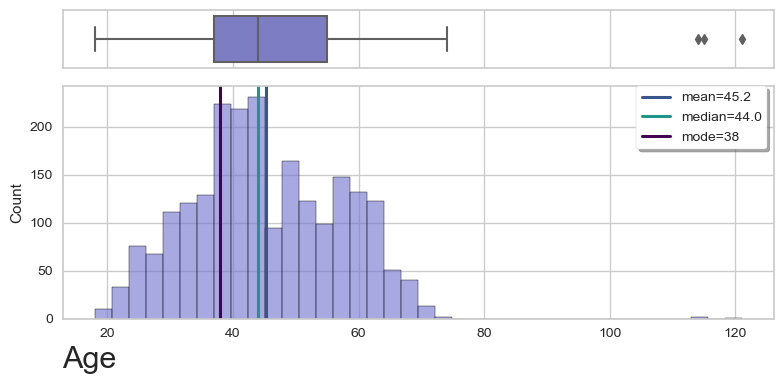

In [79]:
num_plot(df_copy, 'age')
plt.show()

In [80]:
age_clusters = pd.cut(df_copy.age, [-np.inf,30,60,np.inf], 
                      labels=['young','adult','elderly'])
age_clusters.value_counts(normalize=True).sort_index()

age
young      0.115975
adult      0.763538
elderly    0.120487
Name: proportion, dtype: float64

In [81]:
df_copy['age_category'] = age_clusters

*Вывод*

* Примерно 76%  клиентской базы составляют от 30 до 60. Это указывает на то, что преобладающая возрастная группа среди наших клиентов относится к категории взрослых.

* Данные демонстрируют распределение, которое относительно нормально, но искажено влево. В основном из выброса.

*Доходы клиентов*

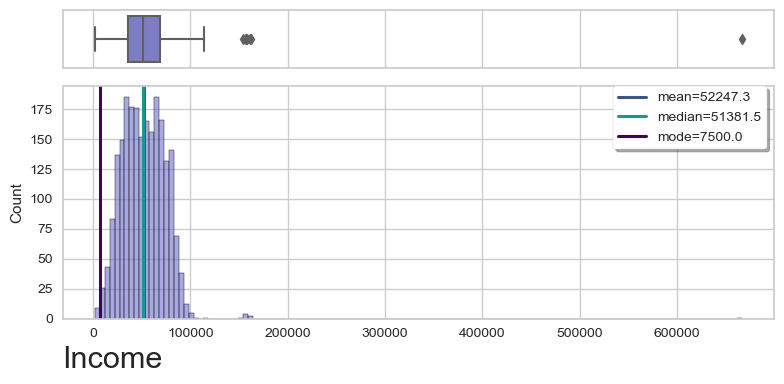

In [82]:
num_plot(df_copy, 'income')
plt.show()

In [83]:
df_copy = df_copy[df_copy['income'] <= 140000]

*Вывод*

* Данные показывают распределение, которое является относительно нормальным, но искаженным вправо.

* Такой вид распределения довольно распространен при анализе доходов.

*Наличие детей*

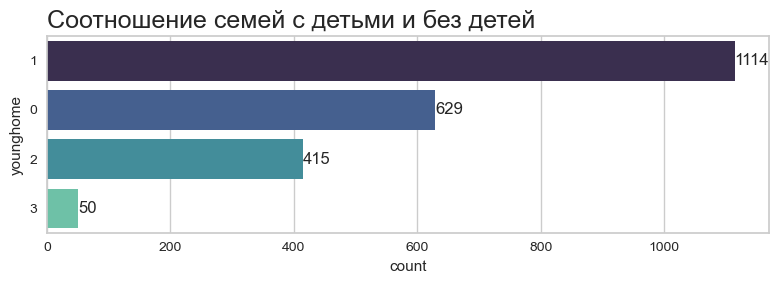

In [84]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='younghome', data=df_copy, 
                  palette='mako',
                  orient='h',
				  order = df_copy['younghome'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title('Соотношение семей с детьми и без детей', loc='left', size=18)
plt.tight_layout()
plt.show()

*Вывод*
* Значительная часть клиентов в наборе данных имеет дома только одного или менее подростков или детей. Это наблюдение соответствует тому, что мы видели ранее - больший процент наших клиентов находится в возрасте от 40 до 60 лет. Это означает, что во многих домохозяйствах их дети уже стали независимыми.

*Доход от возраста*

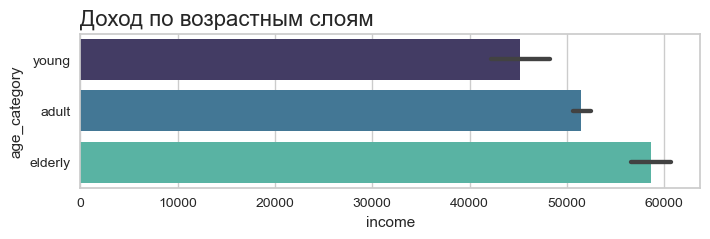

In [85]:
barplot_category(df_copy,'income','age_category','Доход по возрастным слоям')
plt.show()

*Какие связь существуют между клиентами и тем, что они покупают*

In [86]:
products_subset = df_copy.loc[:, :'mntgoldprods'].drop(['kidhome','teenhome','year_birth'], axis=1) 
demographic_subset = df_copy[['age','age_category','partner']]

purchase = pd.concat([products_subset, demographic_subset], axis=1)

# Создаем новый столбец с общим количеством приобретенных продуктов
purchase['mnttotal'] = purchase.loc[:,'mntwines':'mntgoldprods'].sum(1)

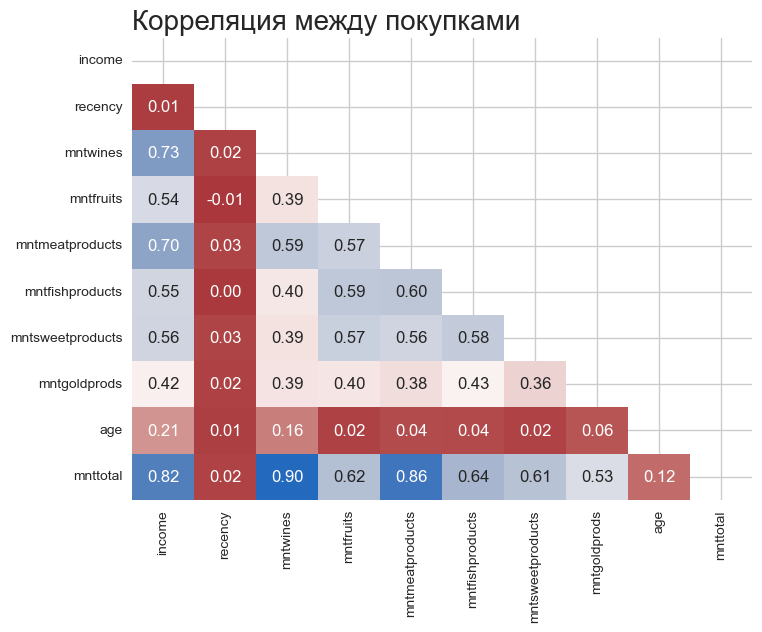

In [87]:
purchase_numbers = purchase.select_dtypes('number')
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(purchase_numbers.corr(), dtype=bool))
sns.heatmap(purchase_numbers.corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
plt.title('Корреляция между покупками', size=20, loc='left')
plt.show()

*Выводы:*

* Люди с более высокими доходами, как правило, больше приобретают вино и мясо, которые являются нашими самыми прибыльными категориями продуктов.

* Существует сильная корреляция между покупкой мяса и вин и общей суммой, потраченной клиентом.

* Клиенты, которые выделяют большую часть своего бюджета на фрукты, также демонстрируют тенденцию покупать рыбу и сладкие продукты.


* Можно создать многоуровневую программу лояльности, чтобы вознаградить высокодоходных клиентов, которые покупают вино и мясо-  это самые прибыльные категории.

* Разрабоать комплексные предложения, которые сочетают в себе покупки мяса и вина, чтобы использовать их корреляцию с более высокими расходами.

* Создать тематические пакеты с фруктами, рыбой и сладкими продуктами, чтобы удовлетворить различные вкусы.

*Эта стратегия использует предпочтения клиентов, стимулируя продажи в ключевых категориях, предлагая эксклюзивные преимущества и разнообразный опыт работы с продуктами.*

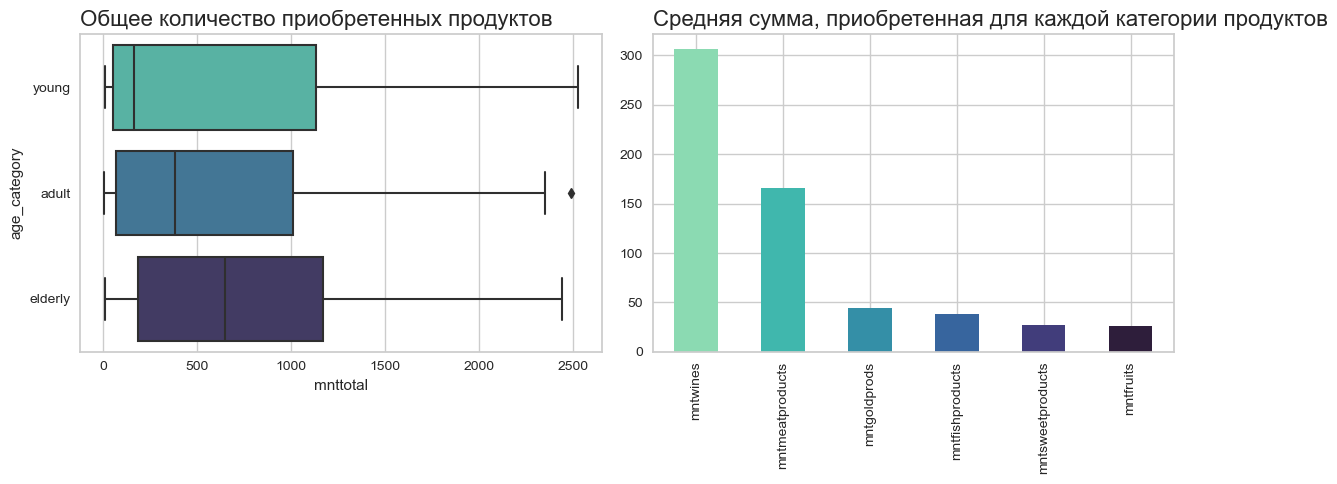

In [88]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x='mnttotal', 
            y='age_category', 
            data=purchase, 
            palette='mako_r', 
            linewidth=1.5,
           ax=ax[0])
ax[0].set_title('Общее количество приобретенных продуктов', loc='left', size=16)

df_copy.loc[:,'mntwines':'mntgoldprods'].mean().sort_values(ascending=False)\
    .plot(kind='bar', 
          color=sns.color_palette('mako_r'),
         ax=ax[1])
ax[1].set_title('Средняя сумма, приобретенная для каждой категории продуктов', size=16, loc='left')

plt.tight_layout()
plt.show()

*Выводы:*
* Существует корреляция между количеством купленных продуктов и возрастом клиента, что, в свою очередь, связано с его доходом. Как правило, более высокий возраст соответствует более высокому доходу и большему приобретению продуктов.



In [89]:
# Добавить столбец "Общая сумма" в кадр данных
df_copy['mnttotal'] = df_copy.loc[:,'mntwines':'mntgoldprods'].sum(1)

*Распределение общего числа покупок*

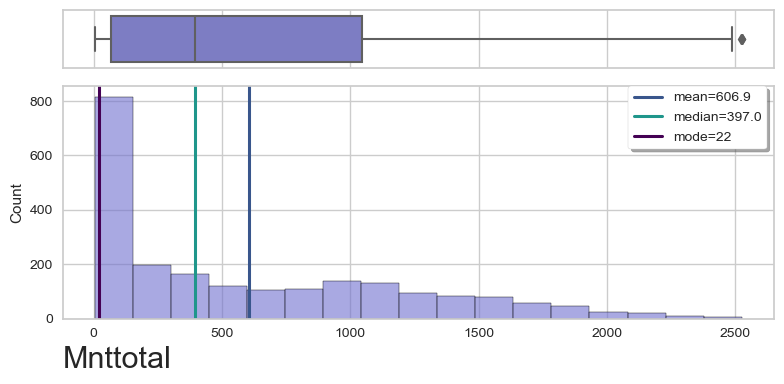

In [90]:
num_plot(purchase,'mnttotal')
plt.show()

*Вывод*

Учитывая идеи, полученные в результате распределения, где примерно 25% клиентов попадают в более низкий диапазон общего объема приобретенных продуктов, перспективная бизнес-стратегия может включать в себя смещение фокуса на оставшиеся 75% клиентов. Этот сегмент большинства предоставляет значительные возможности для целенаправленных маркетинговых усилий и персонализированного взаимодействия.

*Происходит ли это явление из-за того, что пожилые люди стали клиентами раньше?*

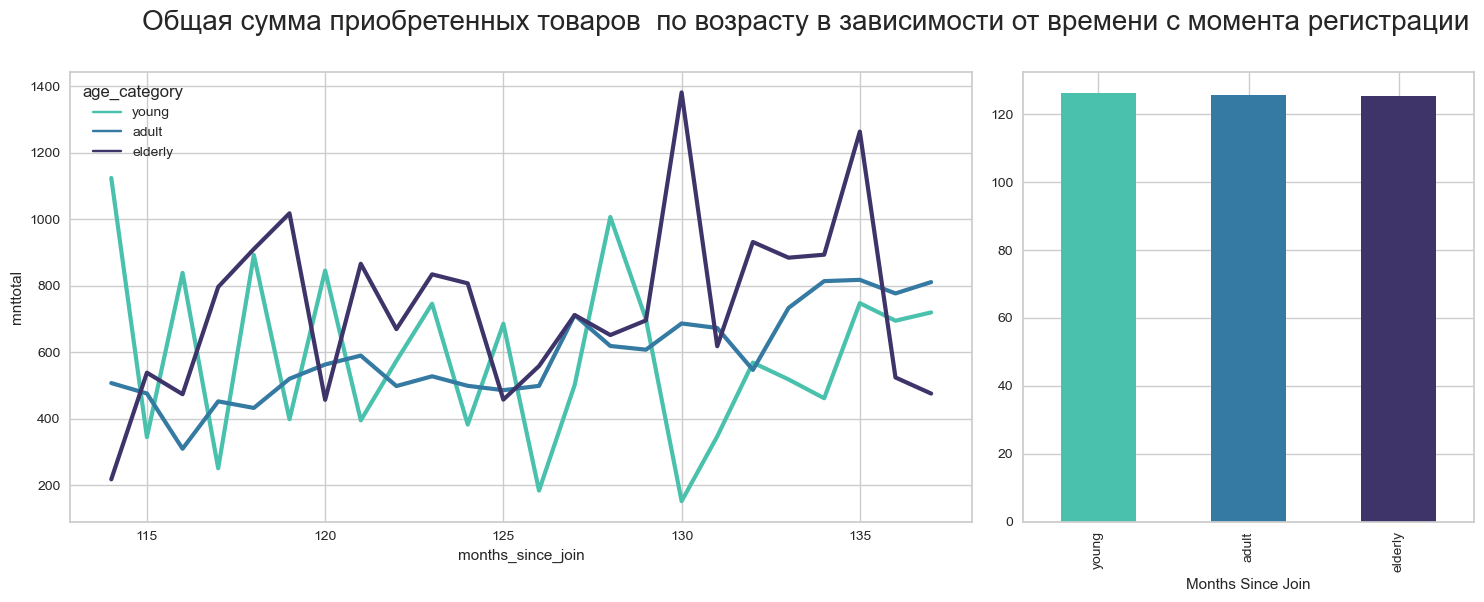

In [91]:
purchase['months_since_join'] = ((datetime.now() - purchase['dt_customer']) / pd.Timedelta(days=30)).astype(int)
group_by_months = purchase.groupby(['months_since_join','age_category'])['mnttotal'].mean().reset_index()

fig, ax = plt.subplots(1,2, figsize=(15,6), gridspec_kw={'width_ratios': [2, 1]})

sns.lineplot(x='months_since_join', 
             y='mnttotal', 
             data=group_by_months, 
             hue='age_category',
             ax=ax[0], 
             palette='mako_r',
            linewidth=3)

purchase.groupby('age_category')['months_since_join'].mean().plot(kind='bar', 
                                                                  color=sns.color_palette('mako_r',3),
                                                                  xlabel='Months Since Join',
                                                                 ax=ax[1])

plt.suptitle('Общая сумма приобретенных товаров  по возрасту в зависимости от времени с момента регистрации', 
             x=0.1, y=1.0, fontsize=20, ha="left")
plt.tight_layout()
plt.show()

*Вывод*
* Количество месяцев с момента регистрации в компании не является основным фактором, влияющим на количество приобретенных продуктов. Независимо от того, сколько месяцев назад люди присоединились, взрослые постоянно покупают меньше продуктов, чем пожилые люди. Более того, наблюдается наблюдаемая тенденция к росту, указывающая на то, что в среднем люди, которые присоединились позже, приобрели больше продуктов.

*Где покупки совершаются чаще всего*

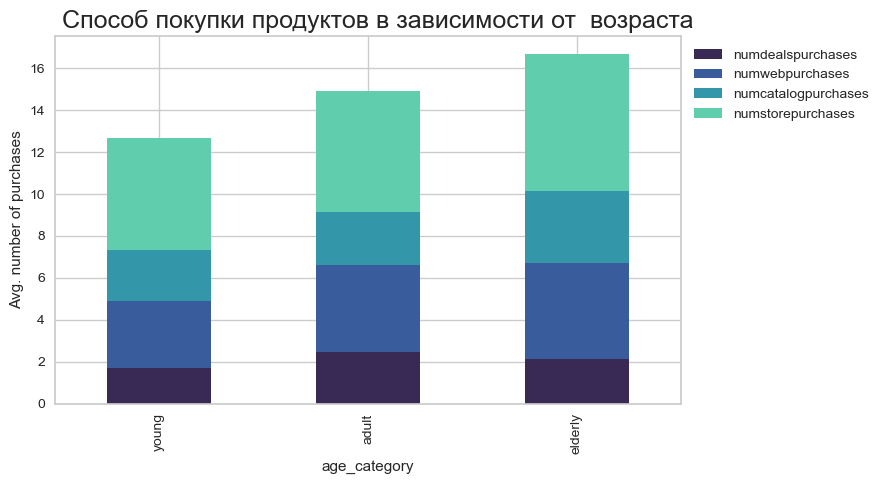

In [92]:
purchasing_channels = ['numdealspurchases','numwebpurchases','numcatalogpurchases','numstorepurchases']
fig, ax = plt.subplots(figsize=(9,5))
df_copy.groupby('age_category')[purchasing_channels].mean()\
                            .plot(kind='bar', ax=ax, stacked=True,
                            color=sns.set_palette('mako',4))

plt.title(' Способ покупки продуктов в зависимости от  возраста', loc='left', size=18)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel('Avg. number of purchases')
plt.tight_layout()
plt.show()

*Выводы:*

* Независимо от возрастной группы, покупки в физическом магазине, очевидно, являются наиболее часто используемым каналом покупок.

* Пожилое население демонстрирует самое высокое среднее значение с точки зрения веб-покупок (являясь вторым наиболее часто используемым каналом).

* Сделки и скидки на покупки постоянно ранжируются как наименее используемый канал во всех возрастных слоях

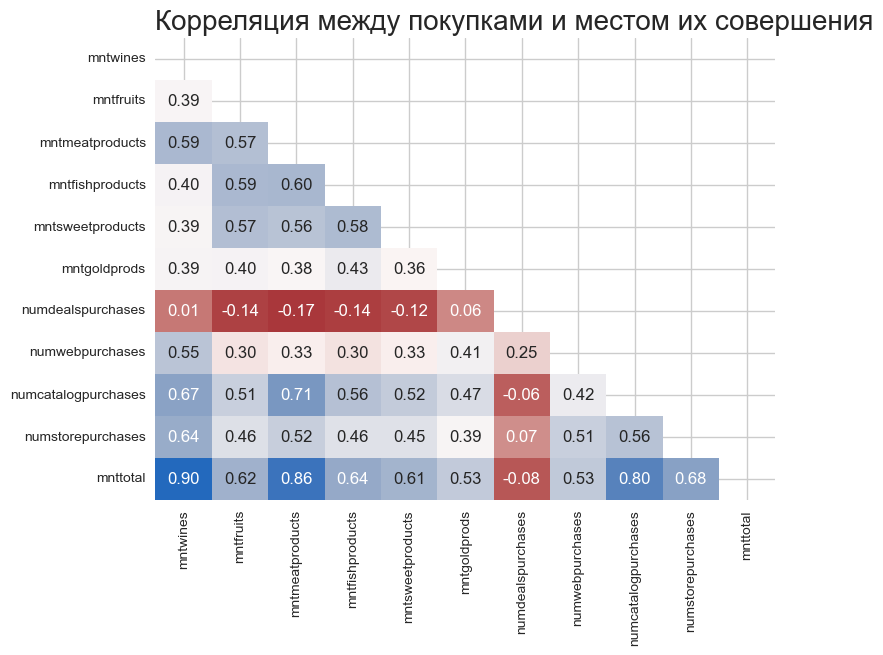

In [93]:
purchasing_channel = pd.concat([df_copy.loc[:,'mntwines':'numstorepurchases'], df_copy['mnttotal']], axis=1)

plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(purchasing_channel.corr(), dtype=bool))
sns.heatmap(purchasing_channel.corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
plt.title('Корреляция между покупками и местом их совершения', size=20, loc='left')
plt.show()

*Выводы:*

* Покупки, совершаемые по скидкам, демонстрируют негативную корреляцию почти со всеми категориями продуктов.

* Количество продуктов в каталоге показывает сильную корреляцию с покупкой мясных продуктов и вин (самые продаваемые товары), а также с общим количеством приобретенных продуктов.

*Сколько акций и предложений клиенты используют и выбирают чаще*

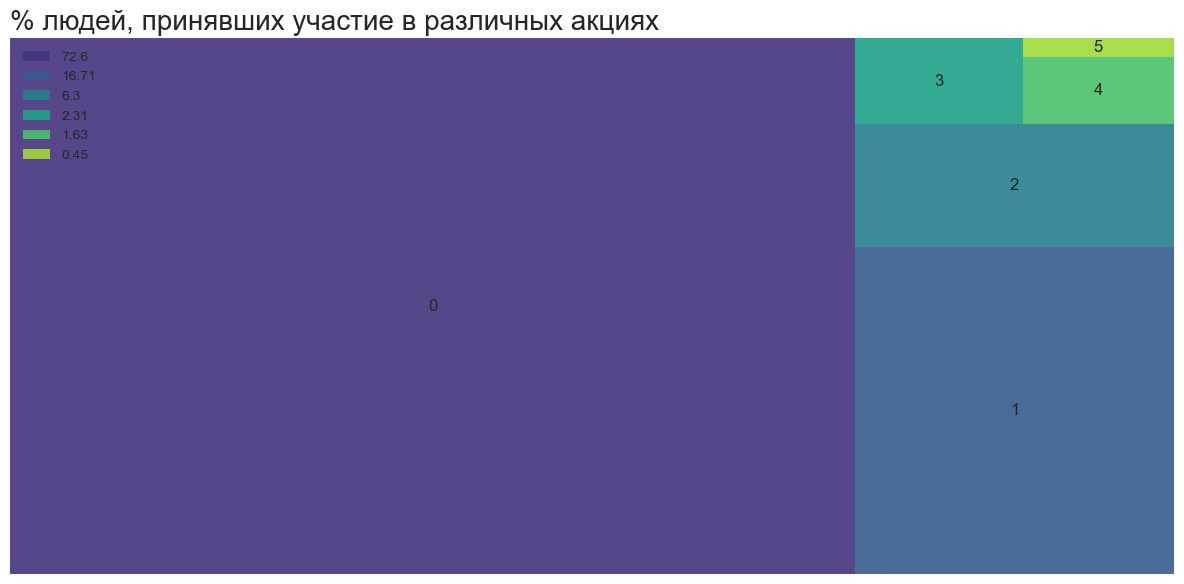

In [94]:
campaigns = df_copy.loc[:,'acceptedcmp3':'response'].drop('complain', axis=1)
people_acceptance = campaigns.sum(1).value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12,6))
squarify.plot(sizes=people_acceptance, label=people_acceptance.index,
              color=sns.color_palette('viridis',len(people_acceptance)),
              alpha=.9)
plt.legend(np.round(people_acceptance*100,2))
plt.axis('off')
plt.title('% людей, принявших участие в различных акциях', loc='left', size=20)
plt.tight_layout()
plt.show()

*Вывод*
* Примерно 73% клиентов никогда не принимали ни одной акции.

* Около 10% клиентов приняли более 1.

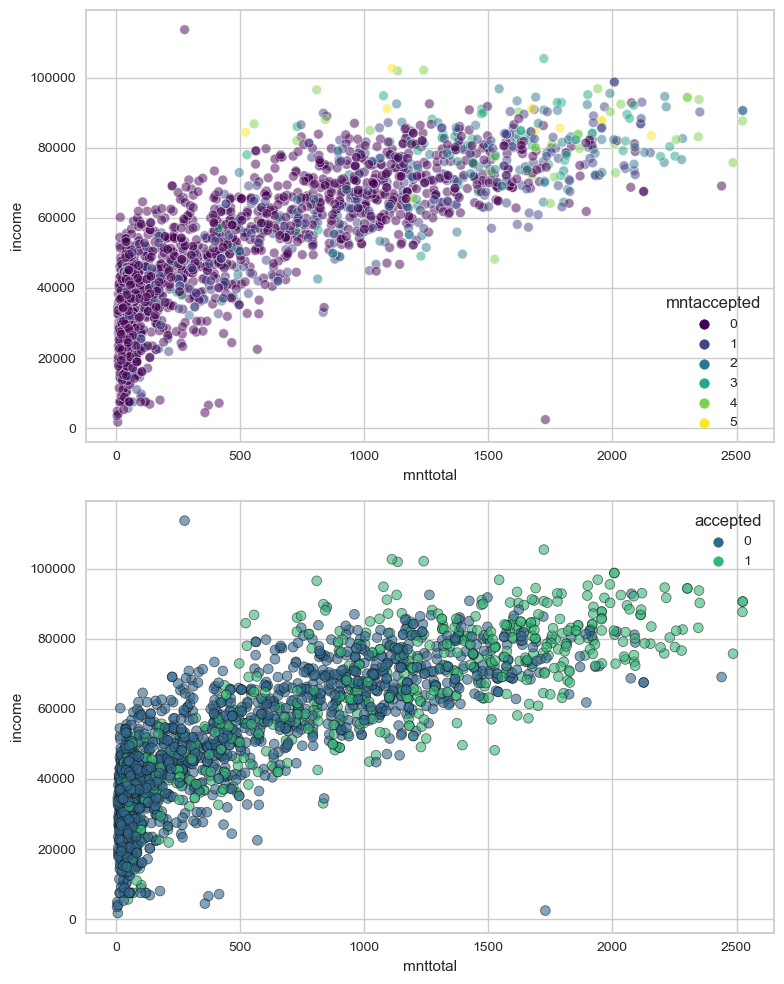

In [95]:
df_without_outliers = df_copy.loc[(df_copy.year_birth > 1940) & (df_copy.income < 200_000)]
df_without_outliers['mntaccepted'] = campaigns.sum(1)
df_without_outliers['accepted'] = df_without_outliers['mntaccepted'].apply(lambda x: 1 if x > 0 else x)

fig, ax = plt.subplots(2, figsize=(8,10))
sns.scatterplot(data=df_without_outliers,
                        x='mnttotal', y='income',
                        hue='mntaccepted',
                        palette='viridis',
                        alpha=.5,
                        ax=ax[0])


sns.scatterplot(data=df_without_outliers,
                        x='mnttotal', y='income',
                        hue='accepted',
                        palette='viridis',
                        alpha=.6,
                        edgecolor='k',
                        ax=ax[1])

plt.tight_layout()
plt.show()

*Выводы*

* Видна связь между уровнем дохода и количеством приобретенных продуктов.

* Клиенты с более высокими доходами  более склонны положительно реагировать на акции.

* Кроме того, те клиенты, которые приняли большее количество акций и предложений, с большей вероятностью совершают покупки более крупных продуктов.

# Предварительная обработка данных

*В этом разделе будет редварительная обработка данных для выполнения кластеризации.*



In [96]:
df_copy.columns


Index(['year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response', 'younghome', 'age', 'partner',
       'age_category', 'mnttotal'],
      dtype='object')

Функция numtotalpurchases - это сумма всех покупок, сделанных клиентом

In [97]:
df_copy['numtotalpurchases'] = df_copy.filter(regex='num[^deals].+purchases').sum(axis=1)

Убрираем значения строк клиентов, которые ничего не приобретали

In [98]:
df_copy.drop(df_copy.loc[(df_copy['numtotalpurchases'] == 0) & (df_copy['mnttotal'] != 0)].index, inplace=True)

Создадим новый столбец "Средний чек"

In [99]:
df_copy['avgcheck'] = df_copy['mnttotal'] / df_copy['numtotalpurchases']

Выберем переменные, которые будут участвововать с кластеризации 

In [100]:
SELECTED_FEATURES = ['avgcheck', 'income','numtotalpurchases', 'mnttotal']

In [101]:
scaler = gen_features(
    columns = [[c] for c in SELECTED_FEATURES],
    classes=[{'class': PowerTransformer, 'method': 'box-cox'}]
)

In [102]:
scaling_mapper = DataFrameMapper(scaler, default=None, df_out=True)
data_cleaned_scaled = scaling_mapper.fit_transform(df_copy)


# Кластеризация

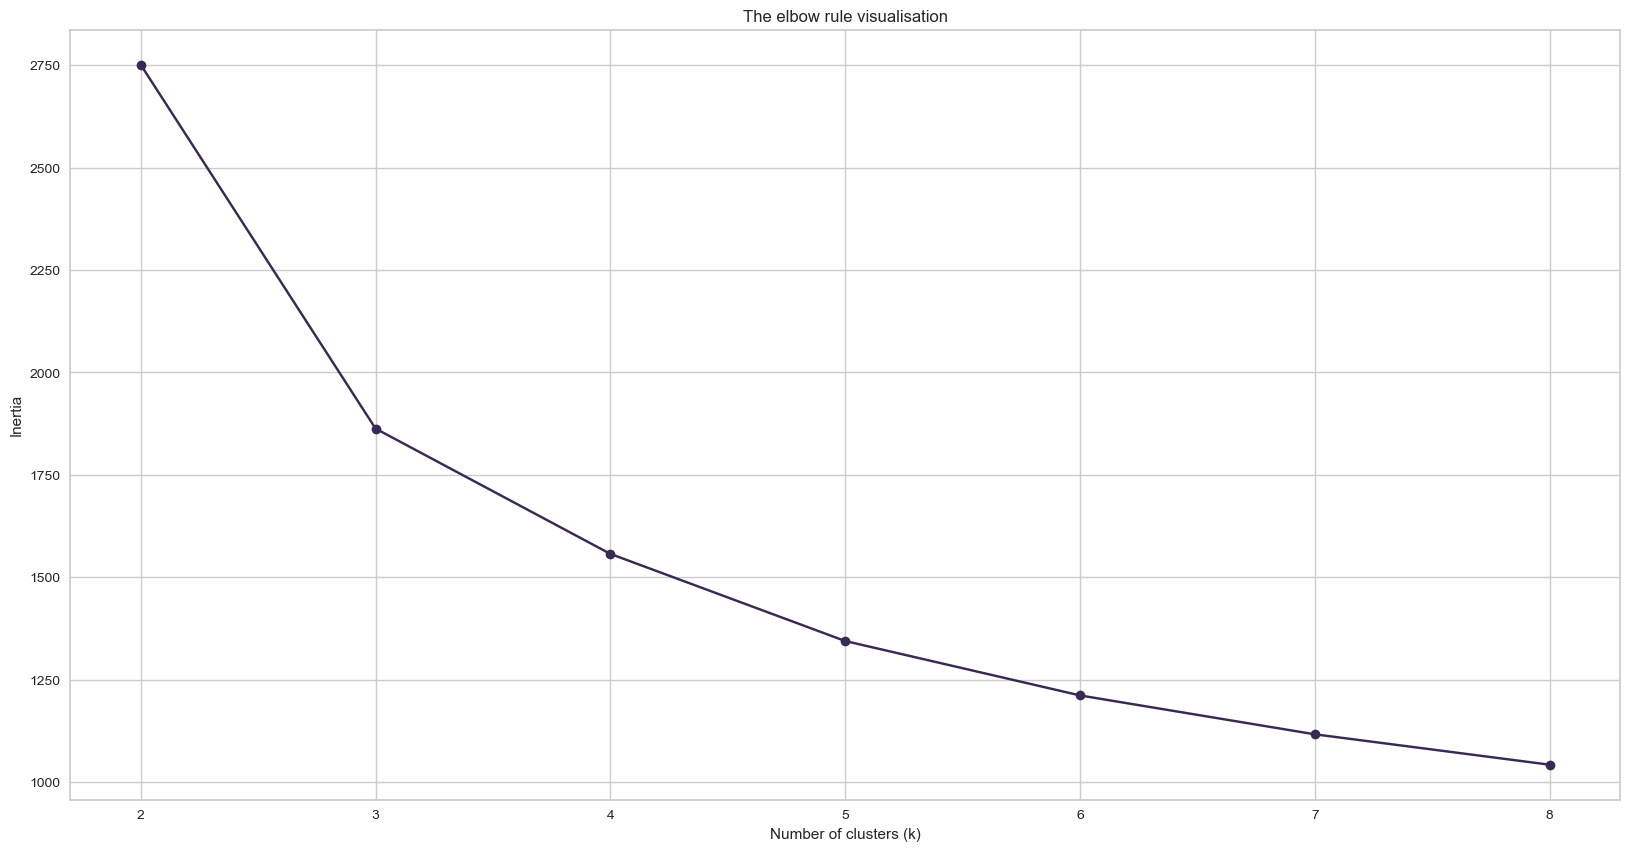

In [103]:
options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42, init='k-means++').fit(data_cleaned_scaled[SELECTED_FEATURES])
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("The elbow rule visualisation")
plt.plot(options, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

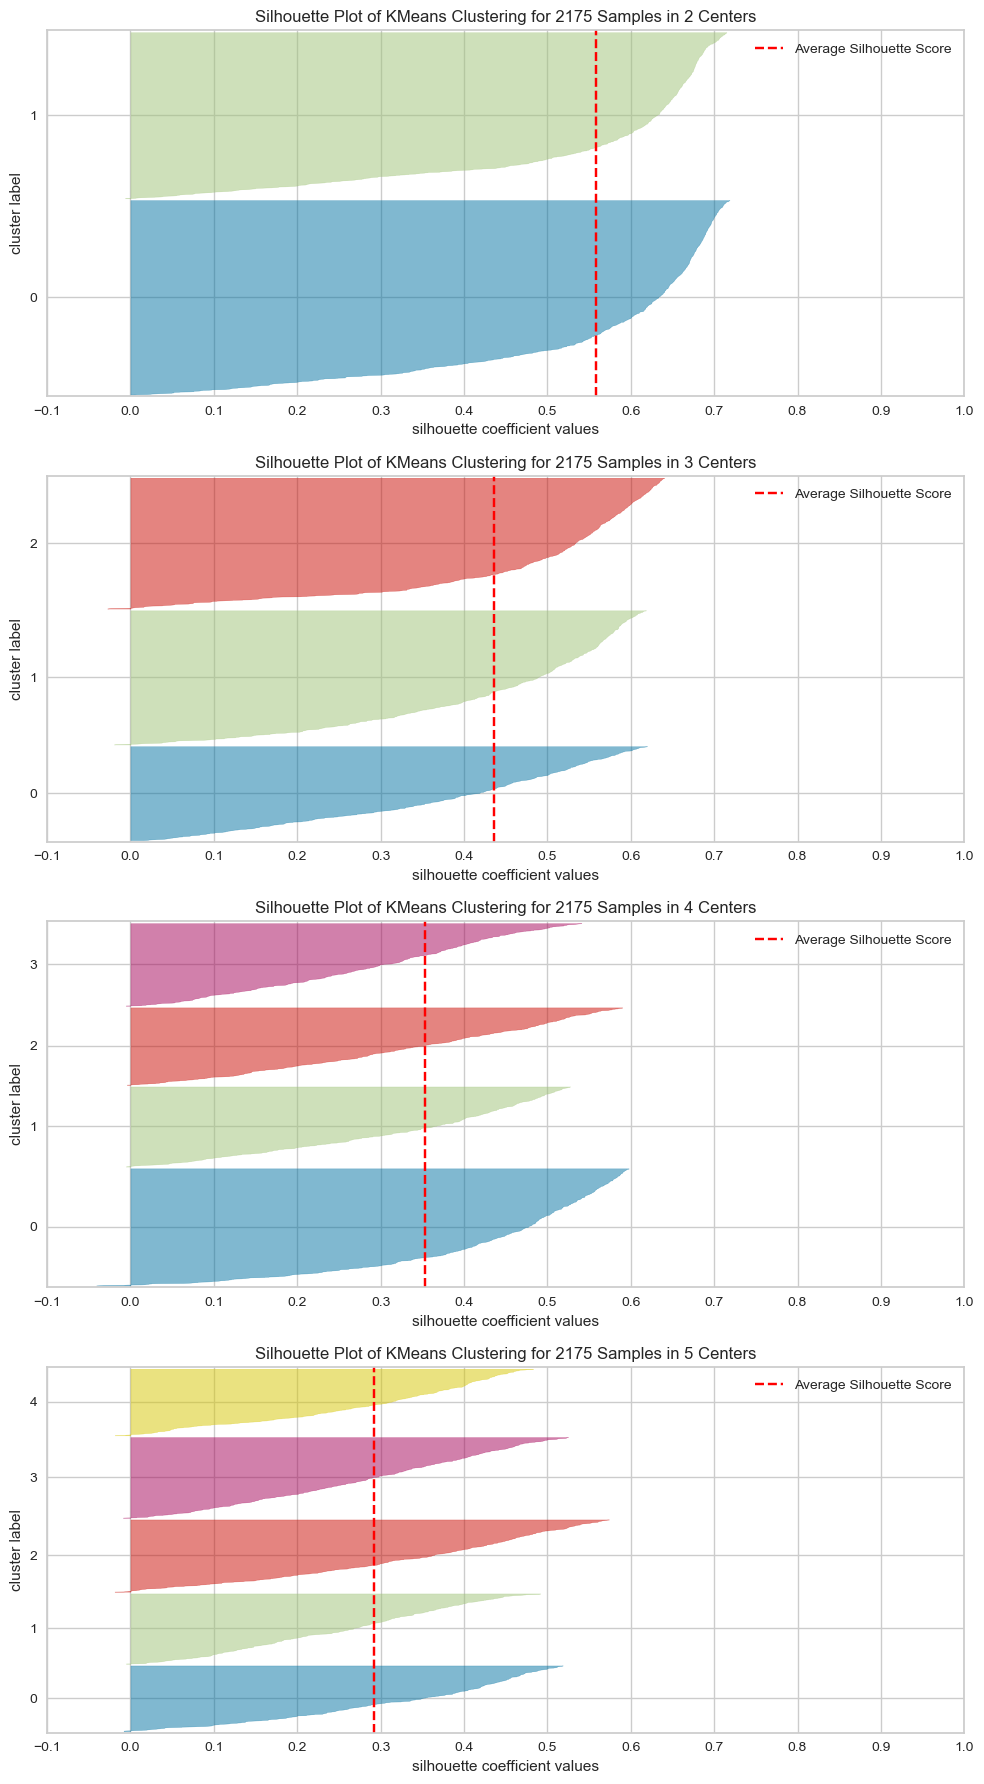

In [104]:
k_range = range(2, 6)
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-2])
    visualizer.fit(data_cleaned_scaled[SELECTED_FEATURES])
    visualizer.finalize()
    axes[i-2].set_xlim(-0.1, 1)
    
plt.tight_layout()



* Согласно графику elbow, 4 или 5 кластеров могут быть оптимальными

* По визуализации silhouette coefficient можно сделать вывод, что 4 кластера наилучший выбор 

In [105]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_cleaned_scaled[SELECTED_FEATURES])

pred = kmeans.predict(data_cleaned_scaled[SELECTED_FEATURES])

data_cleaned_clustered = df_copy.copy()
data_cleaned_clustered['Cluster'] = pred + 1

In [106]:
fig = px.scatter_3d(data_cleaned_clustered, x="income", y="mnttotal", z="avgcheck", color='Cluster', width=800, height=800)
fig.show()


# Кластерный анализ

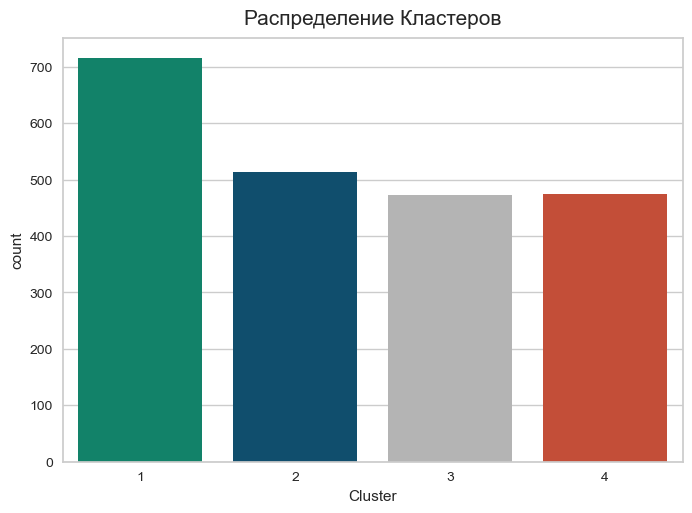

In [107]:
pal = ['#009473', '#00537c', '#b4b4b4', '#da3e21']
pl = sns.countplot(x= data_cleaned_clustered['Cluster'], palette= pal)
pl.set_title("Распределение Кластеров", pad=10, size = 15)
plt.show()

Эти кластеры показывают  равномерное распределение по всему набору данных. Поскольку доходы и траты вносят значительный вклад, мы создадим график кластеров на основе этих двух переменных.

In [108]:
re_clust = {
    1: 'Обычный клиент',
    2: 'Хороший клиент',
    3: 'Лучший клиент',
    4: 'Потенциально хороший клиент'}
df['Clusters_Customers'] = data_cleaned_clustered['Cluster'].map(re_clust)

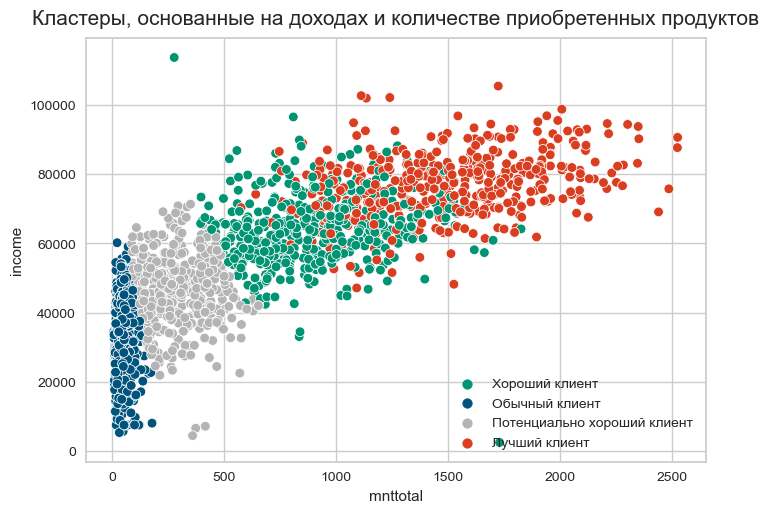

In [109]:
pl = sns.scatterplot(data = df, x = df_copy['mnttotal'], y = df_copy['income'], hue =df['Clusters_Customers'] , palette = pal)
pl.set_title('Кластеры, основанные на доходах и количестве приобретенных продуктов', pad=10, size=15)
plt.legend()
plt.show()

*Вывод*

Как показано выше, доходы и траты имеют прочные отношения. Кластеры показывают более подробное представление о своих шаблонах:

* Группа 1: низкие расходы и низкий доход

* Группа 2: низкие расходы и средний доход

* Группа 3: высокие расходы и средний доход

* Группа 4: высокие расходы и высокий доход

Чтобы сделать его более понятным, мы будем классифицировать группу 1 как обычных клиентов, группу 2 как потенциально хороших клиентов, группу 3 как хороших клиентов и группу 4 как лучших клиентов.

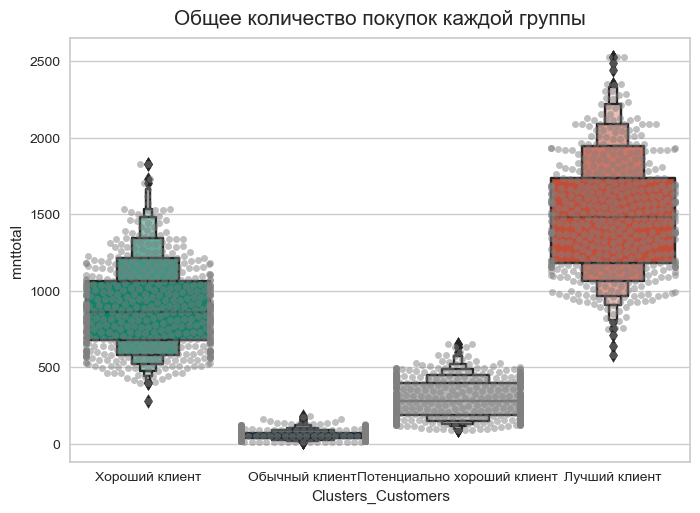

In [110]:
plt.figure()
pl=sns.swarmplot(x=df['Clusters_Customers'] , y=df_copy['mnttotal'], color= "gray", alpha=0.5 )
pl=sns.boxenplot(x=df['Clusters_Customers'] , y=df_copy['mnttotal'], palette=pal)
pl.set_title("Общее количество покупок каждой группы", pad=10, size=15)
plt.show()

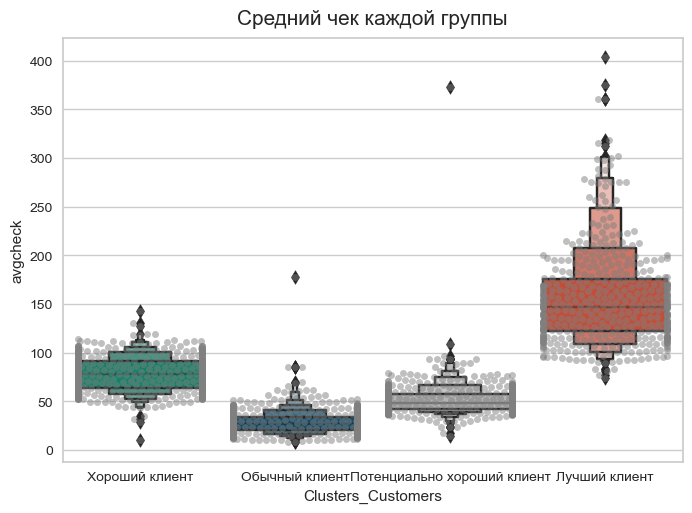

In [111]:
plt.figure()
pl=sns.swarmplot(x=df['Clusters_Customers'] , y=df_copy['avgcheck'], color= "gray", alpha=0.5 )
pl=sns.boxenplot(x=df['Clusters_Customers'] , y=df_copy['avgcheck'], palette=pal)
pl.set_title(("Средний чек каждой группы"), pad=10, size=15)
plt.show()

In [112]:
df["totalpromos"] = df_copy["acceptedcmp3"]+ df_copy["acceptedcmp4"]+ df_copy["acceptedcmp5"]+ df_copy["acceptedcmp2"]+ df_copy["acceptedcmp1"]

# Сгруппируем данные по кластерам и просуммируйте общее количество принятых рекламных акций
cluster_promos = df.groupby('Clusters_Customers')[['totalpromos']].sum().reset_index()

# Рассчитаем процент рекламных акций, принятых для каждого кластера
cluster_promos['percentagepromos'] = round(cluster_promos['totalpromos']*100/ cluster_promos['totalpromos'].sum(), 2)

cluster_promos

,Clusters_Customers,totalpromos,percentagepromos
0,Лучший клиент,390.0,59.00
1,Обычный клиент,60.0,9.08
2,Потенциально хороший клиент,59.0,8.93
3,Хороший клиент,152.0,23.00


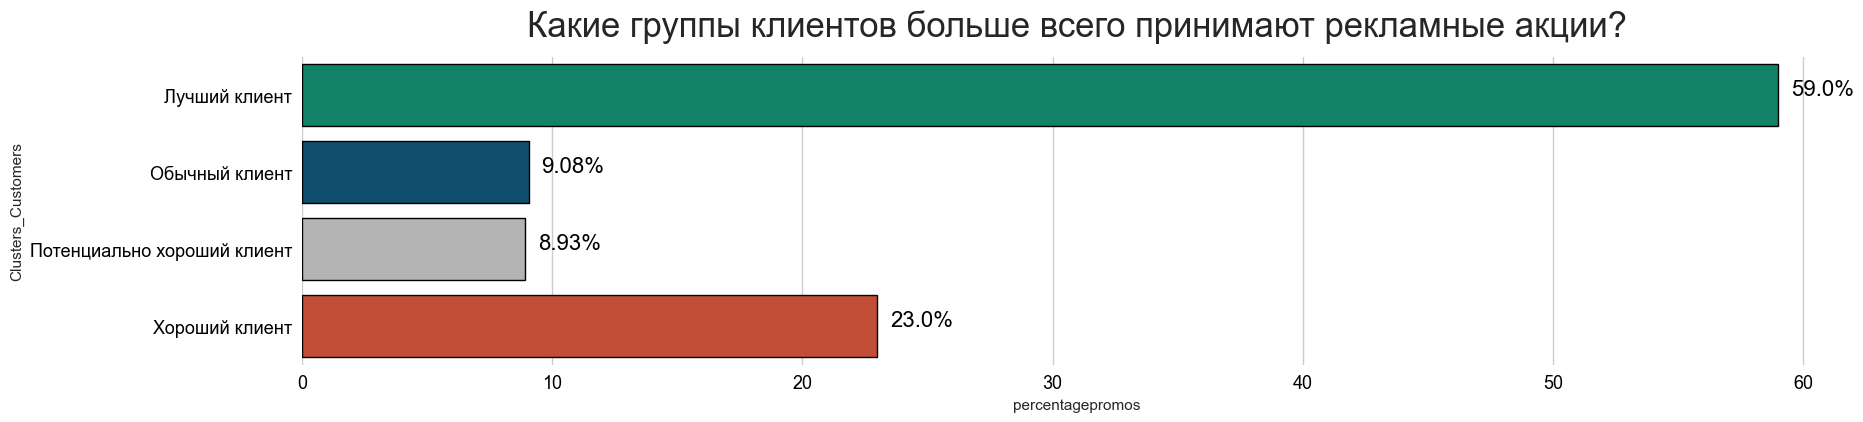

In [113]:
fig = plt.figure(figsize = (20, 4))

a = sns.barplot(data=cluster_promos, x='percentagepromos', y='Clusters_Customers', 
                palette=pal, linestyle="-", linewidth=1, edgecolor="black")
plt.xticks(size=13, color='black')
plt.yticks(size=13, color='black')
plt.title('Какие группы клиентов больше всего принимают рекламные акции?', pad=15, size=25)


for i, v in enumerate(cluster_promos['percentagepromos']):
    a.text(v + 0.5, i, (str(v)+"%"), color='black', fontsize=16)
    
for j in ['right', 'top', 'left', 'bottom']:
    a.spines[j].set_visible(False)

plt.show()

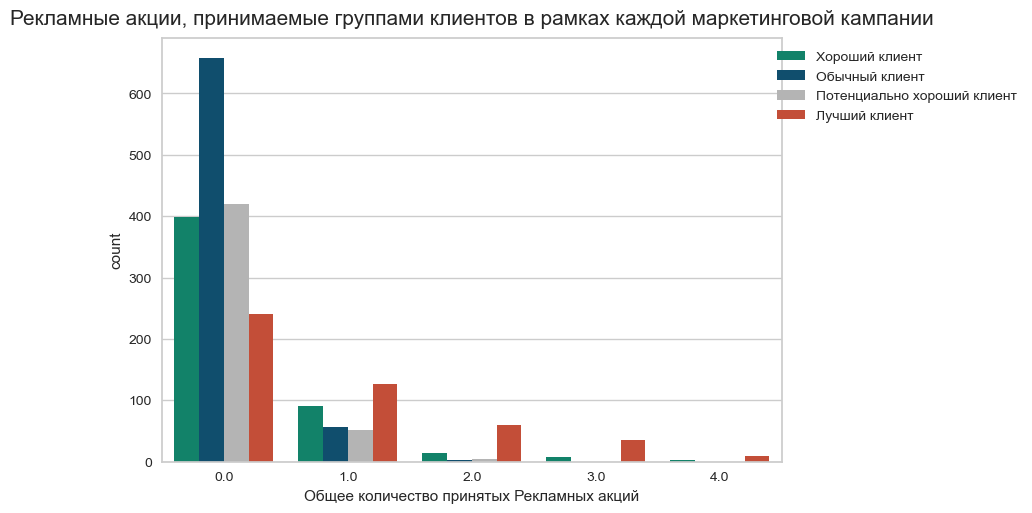

In [114]:
plt.figure()
pl = sns.countplot(x=df["totalpromos"],hue=df["Clusters_Customers"], palette= pal)
pl.set_title("Рекламные акции, принимаемые группами клиентов в рамках каждой маркетинговой кампании", pad=10, size=15)
pl.set_xlabel("Общее количество принятых Рекламных акций")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1))
plt.show()